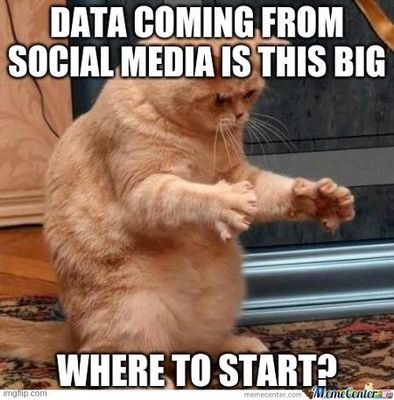

# 1. Define the problem. What is the input? What is the output?

**Our problem, What is the input? What is the output?**

- The problem is to predict the product ratings of Wish.com products based on other features of the products.

- The goal is to estimate how likely people will like a product and understand the conditions under which a product will be highly rated.

**Input vs Output:**

- The input is the various features of the products such as product type, description, price, and image, among, Others.

- The output is the predicted product rating, which is in categories from 1 to 5.


#2. What data mining function is required?

The data mining function required is classification since the goal is to predict the product rating
 based on other features of the product.

#3. What could be the challenges?

The challenges could include dealing with noisy data, missing values, and irrelevant or unnecessary features.
 Also, the features included in the dataset may not be sufficient to accurately predict the product rating which may require additional data sources or feature engineering.

#4. What is the impact?

The impact of accurately predicting the product rating is that it can help businesses understand their customer
 base and tailor their products to meet customer preferences. It can also help businesses identify the features
that are most important to customers, which can inform product development and marketing strategies.

#5. What is an ideal solution?

My experiment is I have tried many feauters and do deep preprocessing with using different simple models like SVM, Desision tree and Naive Bayes.
but in general, an ideal solution would be to develop a machine learning model that accurately predicts
the product rating based on the available features, while also being able to handle missing or noisy data. The
model should also be easily interpretable, so that businesses can understand the factors that are most important for predicting product ratings. Additionally, the model should be regularly updated with new data to ensure its accuracy over time.





# Utiles

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# metrics performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score

#grid search to find the optimal hyperparameters.
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Uploading data for training and testing

In [ ]:
# read the dataset from 2 files one for train and another for test.
train = pd.read_csv('/content/train_new.csv')
test = pd.read_csv('/content/test_new.csv')

In [ ]:
# check the shape of the train dataset
train.shape

(1094, 34)

In [ ]:
# check the shape of the test dataset reduced by one as the label rating isn't included
test.shape

(479, 33)

In [ ]:
# print the first 10 samples in my data. just for discover my dataset
train.head(10)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
5,14.00,51,EUR,100,0,4.0,36,0,0,0,...,pashesa,"(16,885 notes)",16885,3.897898,58a6f41a96f1bb57840b0ed4,0,NaN,summer,2020-08,633
6,3.67,9,EUR,5000,0,3.0,510,0,0,0,...,shenzhenfinejofashioncoltd,"(253,249 notes)",253249,4.070618,53e4bb20ff4d6d1b68bdb6d1,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,38
7,8.00,7,EUR,50,1,4.0,6,0,0,0,...,xiakeliuxingfushi,82 % avis positifs (519 notes),519,3.791908,5b0fa1b72c3c1d2abb34f1a4,0,NaN,summer,2020-08,203
8,9.00,8,EUR,5000,0,4.0,761,0,0,0,...,leescloset,"88 % avis positifs (5,819 notes)",5819,4.151916,583e34bb0299bc7904a92edf,0,NaN,summer,2020-08,1230
9,19.00,21,EUR,5000,0,4.0,1561,0,0,0,...,litiannetworking,"87 % avis positifs (9,116 notes)",9116,4.092914,530306fe34067e3f15c41d87,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,826


# Preprocessing

In [ ]:
# First, lets drop duplicates (if any)
train.drop_duplicates(inplace=True)

In [ ]:
# get mean and count to the available numerical features
train.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393,772.207495
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445,453.784430
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000,382.250000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,752.500000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000,1166.500000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


In [ ]:
# check the numbers of the null per each coloumns and sort it descending to print the most feaures have non values so much.
train.isna().sum().sort_values(ascending=False)

merchant_profile_picture        924
has_urgency_banner              745
urgency_text                    745
product_color                    29
origin_country                   12
product_variation_size_id        12
merchant_name                     4
price                             0
merchant_title                    0
merchant_info_subtitle            0
countries_shipped_to              0
merchant_rating_count             0
merchant_rating                   0
merchant_id                       0
merchant_has_profile_picture      0
theme                             0
crawl_month                       0
inventory_total                   0
shipping_is_express               0
retail_price                      0
shipping_option_price             0
shipping_option_name              0
product_variation_inventory       0
tags                              0
badge_fast_shipping               0
badge_product_quality             0
badge_local_product               0
badges_count                

In [ ]:
# calculate the precent non values per each columns to decide which columns need to remove and the other need to just fill it with other values
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
percent

merchant_profile_picture        0.844607
has_urgency_banner              0.680987
urgency_text                    0.680987
product_color                   0.026508
origin_country                  0.010969
product_variation_size_id       0.010969
merchant_name                   0.003656
price                           0.000000
merchant_title                  0.000000
merchant_info_subtitle          0.000000
countries_shipped_to            0.000000
merchant_rating_count           0.000000
merchant_rating                 0.000000
merchant_id                     0.000000
merchant_has_profile_picture    0.000000
theme                           0.000000
crawl_month                     0.000000
inventory_total                 0.000000
shipping_is_express             0.000000
retail_price                    0.000000
shipping_option_price           0.000000
shipping_option_name            0.000000
product_variation_inventory     0.000000
tags                            0.000000
badge_fast_shipp

In [ ]:
# make the threshold to be 60%. This mean any columns acheive this percentage must remove it because acually filling these big missing data means that adding noise
percent[percent>=0.6]

merchant_profile_picture    0.844607
has_urgency_banner          0.680987
urgency_text                0.680987
dtype: float64

### Summary about the previous part:
- From the last output cell, we can't select these features for the project as they have many non values and can't fill these missing data because they are too large with threshold 60%.

- These features are merchant_profile_picture, has_urgency_banner, urgency_text will be removed.


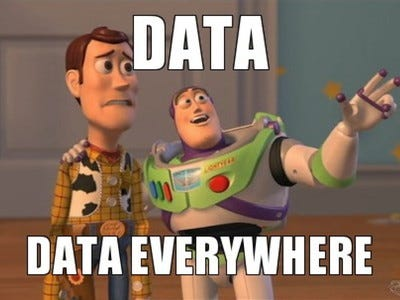

# Preprocessing & Data Visualization for numeric features first then categorical features

In [ ]:
# to select numerical columns:
df_numeric = train.select_dtypes(include=np.number)

# to select categorical columns:
df_caregorical = train.select_dtypes(include =['object'])

In [ ]:
# show the selected numerical features. We have 20 features.
df_numeric

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
0,8.00,7,10000,1,4.0,1670,0,0,0,0,50,3,0,30,50,NaN,66644,4.137582,1,272
1,8.00,7,1000,0,4.0,843,1,1,0,0,50,3,0,37,50,NaN,25752,4.256873,0,1515
2,6.00,34,100,0,4.0,10,0,0,0,0,50,2,0,41,50,NaN,3897,3.928920,0,940
3,4.67,4,100,1,3.0,82,0,0,0,0,5,1,0,25,50,NaN,7497,4.079365,0,309
4,8.00,11,1000,0,4.0,127,0,0,0,0,50,3,0,15,50,1.0,173,4.306358,0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,50,1,0,41,50,NaN,230951,4.311066,0,1381
1090,5.00,5,1000,0,5.0,377,1,0,1,0,31,2,0,35,50,NaN,2904,4.422521,0,212
1091,9.00,48,1000,1,4.0,135,0,0,0,0,50,3,0,25,50,NaN,6632,3.748794,0,163
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,50,2,0,45,50,1.0,5816,3.936382,0,674


In [ ]:
# show the selected categorical features. We have 13 features. it shows that 14 because include the label 'rating'
df_caregorical

,currency_buyer,tags,product_color,product_variation_size_id,shipping_option_name,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_id,merchant_profile_picture,theme,crawl_month
0,EUR,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,Livraison standard,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",577fb2b368116418674befd9,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08
1,EUR,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,Livraison standard,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",566a3ef17233ff2686443082,NaN,summer,2020-08
2,EUR,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,Livraison standard,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",5aacd6c1ccf0c83e5a6f3de0,NaN,summer,2020-08
3,EUR,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,Livraison standard,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",583141fbfef4094e51453d9b,NaN,summer,2020-08
4,EUR,"Summer,Floral print,women dresses,fashion dres...",apricot,S,Livraison standard,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),5d3bc9f8e13a7e654424a4cb,NaN,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,EUR,"corset top,Fashion,crop top,camisole,knittop,T...",red,S,Livraison standard,NaN,CN,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",53f2db3c104dae6bcae0c271,NaN,summer,2020-08
1090,EUR,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",NaN,H01,Livraison standard,NaN,CN,zzbllss,zzbllss,"(2,904 notes)",592968ba63950d682ca4b195,NaN,summer,2020-08
1091,EUR,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,Livraison standard,NaN,CN,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",5b6ec2f2838d931d2fbf7a28,NaN,summer,2020-08
1092,EUR,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,M,Livraison standard,Quantité limitée !,CN,yubenqiang,yubenqiang,"83 % avis positifs (5,816 notes)",58330d7def56284f7634e5e5,NaN,summer,2020-08


<Axes: title={'center': 'Product Rating Prediction'}>

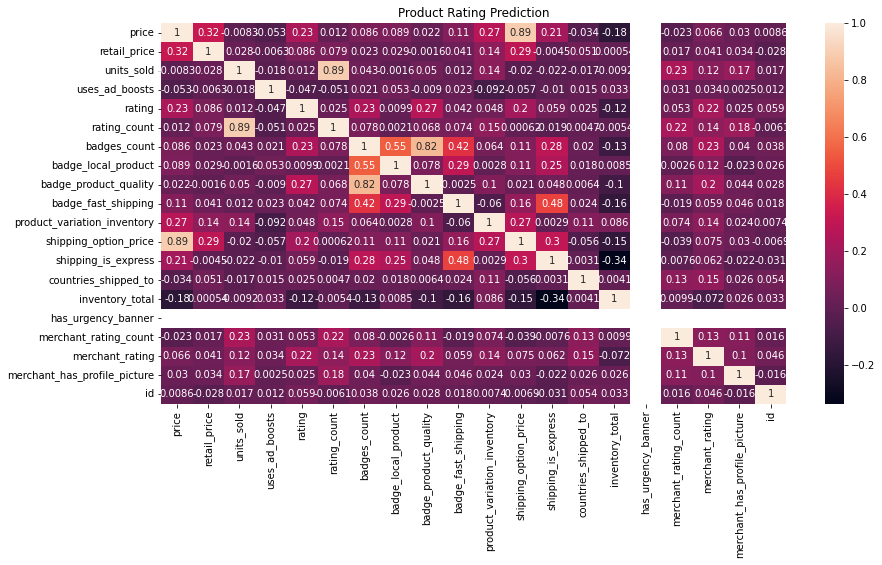

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Product Rating Prediction")

# Heatmap
sns.heatmap(data=train.corr(), annot=True)

- **It's better to try visualize it with removing the coloumns that have many missing values.**

- **Also the coloumns about currency_buyer because it's unique value. Fixed doesn't affect on rating.**

In [ ]:
# Convert the dictionary into DataFrame
df = pd.DataFrame(train)

# Remove 3 columns name is 'has_urgency_banner', 'urgency_text' and 'merchant_profile_picture' have many nan values
df = df.drop(['has_urgency_banner','urgency_text','merchant_profile_picture','currency_buyer'], axis=1)

<Axes: title={'center': 'Product Rating Prediction'}>

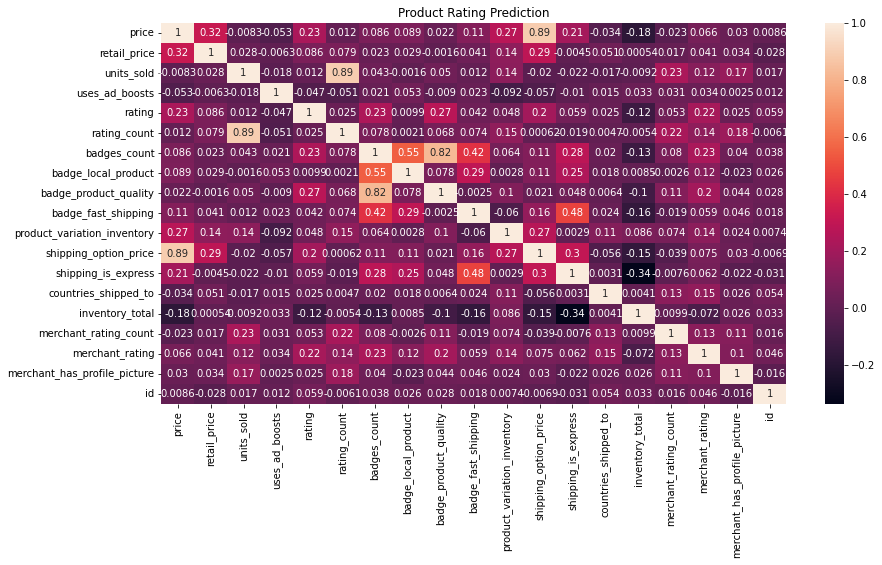

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Product Rating Prediction")

# Heatmap
sns.heatmap(data=df.corr(), annot=True)

**You can see from the heatmaps the most correlated features with the output rating are badges_product_quality (0.27), price (0.23), badges_count (0.23), merchant_rating (0.22), shipping_option_price (0.2)**

So for sure we will select them. What about adding more? Let's think about it later

In [ ]:
df_numeric

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
0,8.00,7,10000,1,4.0,1670,0,0,0,0,50,3,0,30,50,NaN,66644,4.137582,1,272
1,8.00,7,1000,0,4.0,843,1,1,0,0,50,3,0,37,50,NaN,25752,4.256873,0,1515
2,6.00,34,100,0,4.0,10,0,0,0,0,50,2,0,41,50,NaN,3897,3.928920,0,940
3,4.67,4,100,1,3.0,82,0,0,0,0,5,1,0,25,50,NaN,7497,4.079365,0,309
4,8.00,11,1000,0,4.0,127,0,0,0,0,50,3,0,15,50,1.0,173,4.306358,0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,50,1,0,41,50,NaN,230951,4.311066,0,1381
1090,5.00,5,1000,0,5.0,377,1,0,1,0,31,2,0,35,50,NaN,2904,4.422521,0,212
1091,9.00,48,1000,1,4.0,135,0,0,0,0,50,3,0,25,50,NaN,6632,3.748794,0,163
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,50,2,0,45,50,1.0,5816,3.936382,0,674


In [ ]:
#df_numeric = df_numeric.drop(['has_urgency_banner','urgency_text','merchant_profile_picture','currency_buyer'], axis=1)

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: title={'center': 'swarm chart showing '}, xlabel='rating', ylabel='price'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


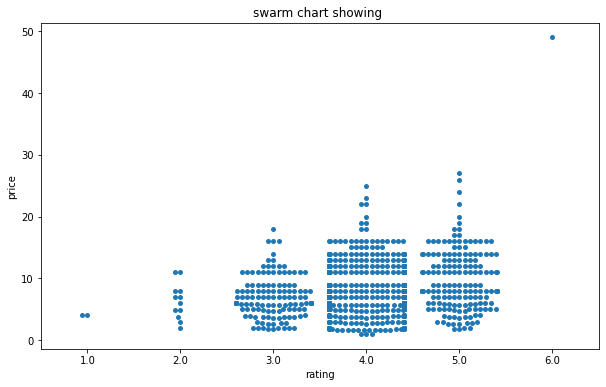

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("swarm chart showing ")

# swarm chart showing average price for data per result rating levels
sns.swarmplot(x=train['rating'],
              y=train['price'])


<ipython-input-20-270efd14e908>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train, x="price", palette=['red', 'blue','black','lightblue','orange','yellow'],hue="rating")
<ipython-input-20-270efd14e908>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=train, x="price", palette=['red', 'blue','black','lightblue','orange','yellow'],hue="rating")


<Axes: title={'center': 'ddd'}, xlabel='price', ylabel='Density'>

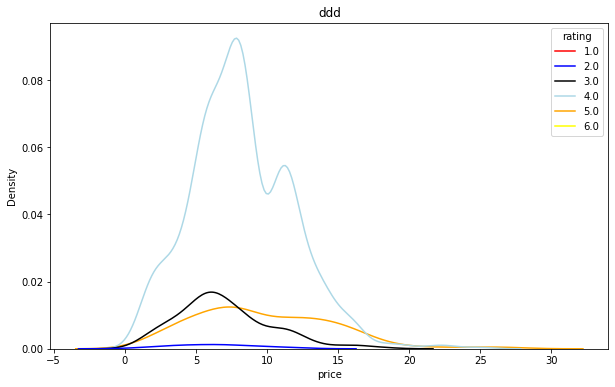

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("ddd")

# kde chart showing price for data
sns.kdeplot(data=train, x="price", palette=['red', 'blue','black','lightblue','orange','yellow'],hue="rating")

<ipython-input-21-fc41341f4939>:2: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=train,x="price",palette=['red', 'blue','black','lightblue','orange'],hue=train.rating)


<Axes: xlabel='price', ylabel='Count'>

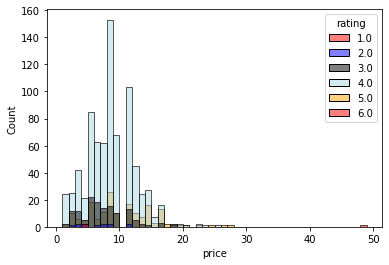

In [ ]:
# hist chart showing price for data with rating shown in legend
sns.histplot(data=train,x="price",palette=['red', 'blue','black','lightblue','orange'],hue=train.rating)

In [ ]:
# group the data by rating.
train.groupby('rating').sum()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
rating,,,,,,,,,,,,,,,,,,,
1.0,8.00,8,100,2,2,0,0,0,0,40,2,0,88,100,1.0,508,7.031496,0,1892
2.0,76.36,402,552,4,32,0,0,0,0,364,22,0,488,600,4.0,123528,47.080039,0,7375
3.0,943.73,2469,278150,62,41175,6,3,0,3,3784,279,1,5243,6750,48.0,2060760,530.735768,16,100473
4.0,6362.13,17885,4279750,341,879668,61,14,42,5,26178,1793,0,31428,38673,249.0,21742527,3132.980235,131,591774
5.0,1663.72,5135,384764,64,80700,57,4,49,4,5523,457,1,7002,8410,47.0,5344387,693.542614,23,143163
6.0,49.00,42,100,0,6,1,0,0,1,2,12,1,41,2,0.0,29977,4.223138,0,118


**Something important that the data has rating 6 and actually your range is from 1 to 5 so adding 6 will make any models I try so bad.**

# Adding a new feature from existing features

- I think of discount price because most of us is so interested in the amount of discount. That may lead to add good rating for features have high discount or offer.

- discount price = retail_price - price.

In [ ]:
df_numeric['discount_price'] = df_numeric['retail_price'] - df_numeric['price']

<ipython-input-24-d8e0340a8fd0>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numeric, x="discount_price", palette=['red', 'blue','black','lightblue','orange','yellow'],hue="rating")
<ipython-input-24-d8e0340a8fd0>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numeric, x="discount_price", palette=['red', 'blue','black','lightblue','orange','yellow'],hue="rating")


<Axes: title={'center': 'ddd'}, xlabel='discount_price', ylabel='Density'>

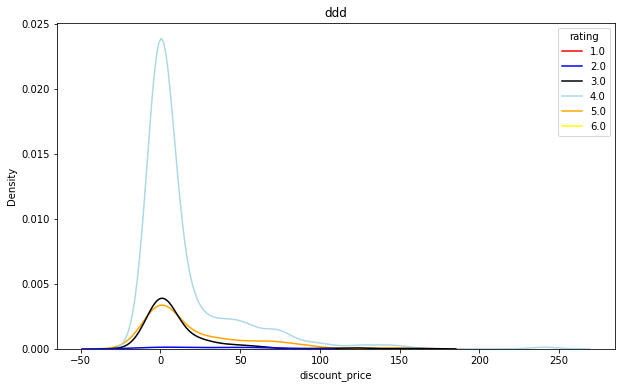

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("ddd")

# kde chart showing discount_price for data with negative values
sns.kdeplot(data=df_numeric, x="discount_price", palette=['red', 'blue','black','lightblue','orange','yellow'],hue="rating")

**There are some negative values. It's supposed to remove them. I have tried to remove them but they are so much and my data is a bit little. I can set all negative values to be equal =0 but this way won't performe well so if we shift the data by 5 for example will performe better.**

In [ ]:
# More modification
df_numeric['discount_price_more'] = df_numeric['retail_price'] - df_numeric['price'] + 5 # add this 5 to shift the negative values

<ipython-input-26-b1d997710a05>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numeric, x="discount_price", palette=['red', 'blue','black','lightblue','orange','yellow'],hue="rating")
<ipython-input-26-b1d997710a05>:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numeric, x="discount_price", palette=['red', 'blue','black','lightblue','orange','yellow'],hue="rating")


<Axes: title={'center': 'ddd'}, xlabel='discount_price', ylabel='Density'>

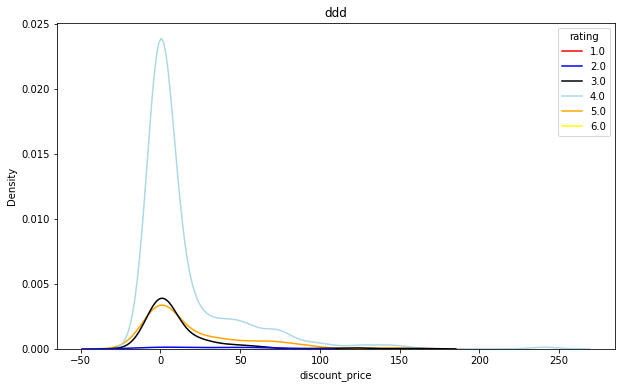

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("ddd")

# kde chart showing discount_price for data without negative values
sns.kdeplot(data=df_numeric, x="discount_price", palette=['red', 'blue','black','lightblue','orange','yellow'],hue="rating")

 **The selected numerical features: badges_product_quality, price, badges_count, merchant_rating, shipping_option_price, discount_price**

 ________________________________________________________


We see that data has rating = 6 and it's only one samples so it's better to remove it

In [ ]:
# fansy codition to just not pass the rating that smaller than or equal 5.
noise_data = train[train['rating'] > 5]

In [ ]:
# it's shown that only one row so easilty we can remove this row.
noise_data

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
971,49.0,42,EUR,100,0,6.0,6,1,0,0,...,yanfenglivingmuseum,"90 % avis positifs (29,977 notes)",29977,4.223138,5925555b2cd9447854443c41,0,NaN,summer,2020-08,118


In [ ]:
# fansy codition to just pass the rating that smaller than or equal 5.
df_filtered = train[train['rating'] <= 5]

In [ ]:
# group the data by rating again and you can see that it has been removed.
df_filtered.groupby('rating').sum()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
rating,,,,,,,,,,,,,,,,,,,
1.0,8.00,8,100,2,2,0,0,0,0,40,2,0,88,100,1.0,508,7.031496,0,1892
2.0,76.36,402,552,4,32,0,0,0,0,364,22,0,488,600,4.0,123528,47.080039,0,7375
3.0,943.73,2469,278150,62,41175,6,3,0,3,3784,279,1,5243,6750,48.0,2060760,530.735768,16,100473
4.0,6362.13,17885,4279750,341,879668,61,14,42,5,26178,1793,0,31428,38673,249.0,21742527,3132.980235,131,591774
5.0,1663.72,5135,384764,64,80700,57,4,49,4,5523,457,1,7002,8410,47.0,5344387,693.542614,23,143163


<Axes: xlabel='price', ylabel='Count'>

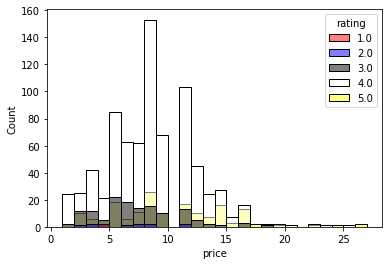

In [ ]:
# hist chart showing price for data
sns.histplot(data=df_filtered,x="price",hue=df_filtered.rating,palette=['red', 'blue','black','white','yellow'], edgecolor='black')

<Axes: xlabel='rating', ylabel='Count'>

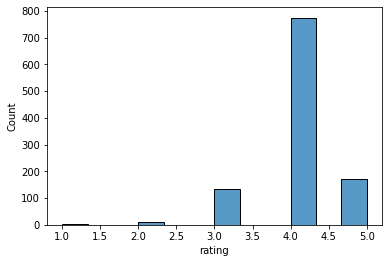

In [ ]:
# imbalnce data and the majority class is number 4. So we may do oversampling
sns.histplot(df_filtered['rating'])

**Comment:**

**we can see the data is unbalanced and the model will baise to rating 4 as the most samples's rating is 4**

# What you can find in this section:

- I have selected 5 features. two of them are redundant features because fixed along all samples. The rest it product color, product size, country.

- I have tried to encode them in less categories with 2 versions for each one.

In [ ]:
# check the numbers of categories for product color feature
len(df_caregorical["product_color"].unique())

88

In [ ]:
# we can see from coloumn 'product_color' need to be normalized and cleaned like [RED, Red, red] and [black & white, white & black]
df_caregorical["product_color"].unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
       'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
       'armygreen', 'lightblue', nan, 'coffee', 'grey', 'skyblue',
       'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
       'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
       'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
       'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
       'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
       'ivory', 'fluorescentg

In [ ]:
# test normalization
df_caregorical["product_color"] = df_caregorical["product_color"].str.lower().str.replace('&','').astype(str).str.replace(" ", "").str.replace("blackwhite", "whiteblack").str.replace("pinkblue","bluepink")

In [ ]:
# after normalization values reduced by 10 which is good
len(df_caregorical["product_color"].unique())

75

**I have tried to group them like that for example.**

**Also I have checked on google the names of some weird color to decide which one to belong.**

- Ex1: black coolblack >> black
- Ex2: lakeblue blue navyblue lightblue skyblue navybluewhite darkblue denimblue >> blue
- Ex3: whitegreen armygreen mintgreen lightgreen darkgreen applegreen green

<Axes: xlabel='product_color_category', ylabel='Count'>

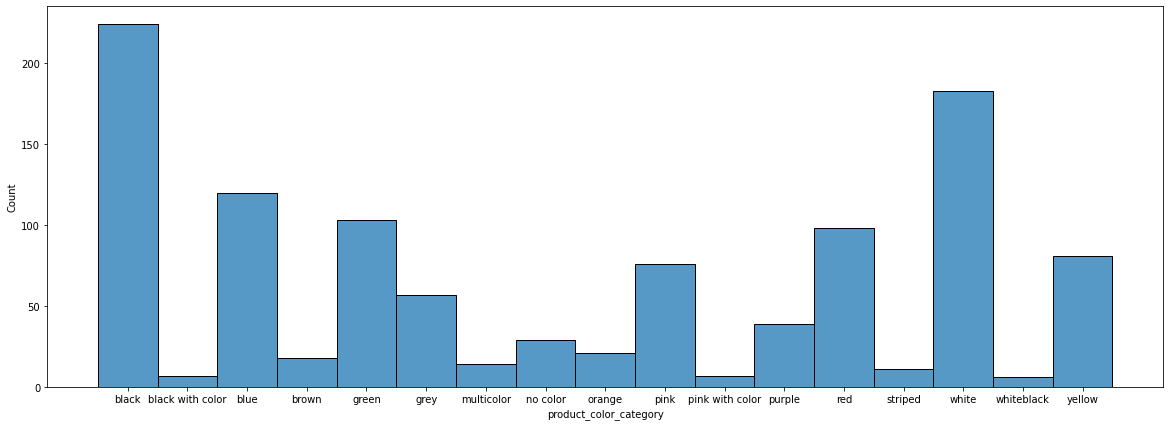

In [ ]:
conditions = [
    df_caregorical["product_color"].isin(['black', 'coolblack']),
    df_caregorical["product_color"].isin(['lakeblue' , 'blue' ,'navyblue' , 'lightblue' , 'skyblue' , 'navybluewhite', 'darkblue' , 'denimblue']),
    df_caregorical["product_color"].isin(['whitegreen' , 'armygreen' , 'mintgreen' , 'lightgreen' , 'darkgreen' , 'applegreen', 'green' , 'fluorescentgreen']),
    df_caregorical["product_color"].isin(['lightpink' , 'pink' , 'dustypink' , 'rosegold']),
    df_caregorical["product_color"].isin(['grey' , 'gray' , 'lightgrey' , 'silver' , 'lightgray' ]),
    df_caregorical["product_color"].isin(['lightyellow' , 'wineredyellow' , 'yellow' , 'khaki']),
    df_caregorical["product_color"].isin(['lightred' , 'red' , 'watermelonred' , 'winered' , 'rosered' , 'rose' , 'burgundy' , 'claret']),
    df_caregorical["product_color"].isin(['offwhite' , 'white' , 'whitefloral' , 'navy' , 'ivory' ]),
    df_caregorical["product_color"].isin(['coffee' , 'brown' , 'beige' , 'nude' , 'brownyellow']),
    df_caregorical["product_color"].isin(['apricot' , 'orange' , 'camel' , 'gold' , 'orange-red']),
    df_caregorical["product_color"].isin(['purple','violet','wine']),
    df_caregorical["product_color"].isin(['leopardprint' , 'camouflage' , 'whitestripe' , 'rainbow' , 'floral' , 'army' , 'leopard' , 'star']),
    df_caregorical["product_color"].isin(['blackyellow' , 'blackblue' , 'blackgreen' ]),
    df_caregorical["product_color"].isin(['pinkgrey' , 'bluepink' , 'pinkblack' , 'pinkwhite']),
    df_caregorical["product_color"].eq('whiteblack'),
    df_caregorical["product_color"].eq('multicolor')
]

choices = ['black','blue','green', 'pink','grey','yellow','red','white','brown','orange','purple','striped' ,'black with color' ,'pink with color' ,'whiteblack','multicolor']
# if the first condition is true the crossbonding first index in list choices will be excuted
df_caregorical['product_color_category'] = np.select(conditions, choices, default='no color')

# convert from categorical to numerical
df_caregorical["product_color_category"] = pd.Categorical(df_caregorical["product_color_category"])
df_caregorical['product_color_int'] = df_caregorical["product_color_category"].cat.codes

plt.figure(figsize=(20,7))
sns.histplot(df_caregorical["product_color_category"])

In [ ]:
# From 88 then 75 to finaly 17
len(df_caregorical["product_color_category"].unique())

17

<Axes: xlabel='product_color_category_more', ylabel='Count'>

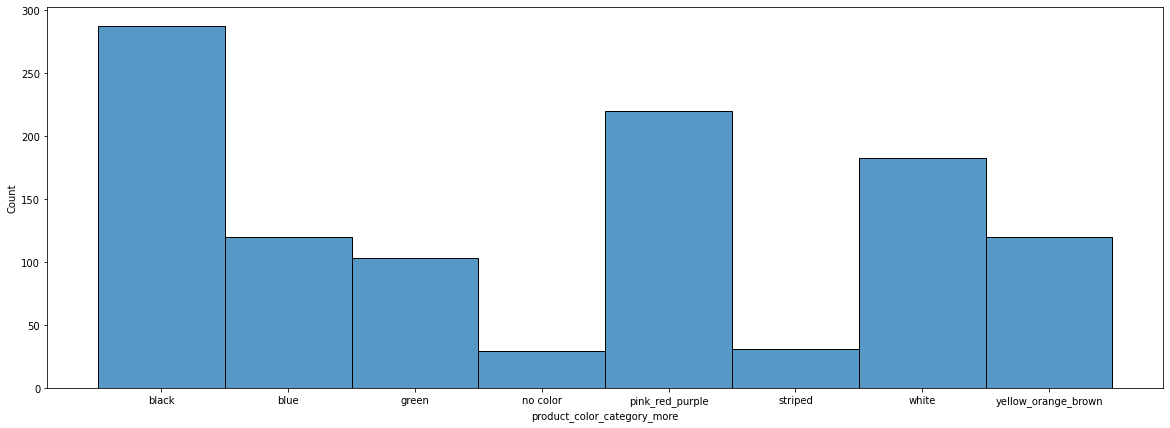

In [ ]:
# More modification.
# Tried to reduce the numbers of groups ASAP
conditions = [
    df_caregorical["product_color"].isin(['black', 'coolblack','blackyellow' , 'blackblue' , 'blackgreen','grey' , 'gray' , 'lightgrey' , 'silver' , 'lightgray']),
    df_caregorical["product_color"].isin(['lakeblue' , 'blue' ,'navyblue' , 'lightblue' , 'skyblue' , 'navybluewhite', 'darkblue' , 'denimblue']),
    df_caregorical["product_color"].isin(['whitegreen' , 'armygreen' , 'mintgreen' , 'lightgreen' , 'darkgreen' , 'applegreen', 'green' , 'fluorescentgreen']),
    df_caregorical["product_color"].isin(['lightpink' , 'pink' , 'dustypink' , 'rosegold','pinkgrey' , 'bluepink' , 'pinkblack' , 'pinkwhite','lightred' , 'red' , 'watermelonred' , 'winered' , 'rosered' , 'rose' , 'burgundy' , 'claret','purple','violet','wine']),
    df_caregorical["product_color"].isin(['lightyellow' , 'wineredyellow' , 'yellow' , 'khaki','apricot' , 'orange' , 'camel' , 'gold' , 'orange-red','coffee' , 'brown' , 'beige' , 'nude' , 'brownyellow']),
    df_caregorical["product_color"].isin(['offwhite' , 'white' , 'whitefloral' , 'navy' , 'ivory' ]),
    df_caregorical["product_color"].isin(['leopardprint' , 'camouflage' , 'whitestripe' , 'rainbow' , 'floral' , 'army' , 'leopard' , 'star','multicolor','whiteblack'])
]

choices = ['black','blue','green', 'pink_red_purple','yellow_orange_brown','white','striped']
# if the first condition is true the crossbonding first index in list choices will be excuted if not the default value is no color
df_caregorical['product_color_category_more'] = np.select(conditions, choices, default='no color')
# convert from categorical to numerical
df_caregorical["product_color_category_more"] = pd.Categorical(df_caregorical["product_color_category_more"])
df_caregorical['product_color_int_more'] = df_caregorical["product_color_category_more"].cat.codes

plt.figure(figsize=(20,7))
# better distribution so I expect better result when selecting it
sns.histplot(df_caregorical["product_color_category_more"])

In [ ]:
# check the numbers of categories for product size feature
len(df_caregorical["product_variation_size_id"].unique())

84

In [ ]:
# we can see from coloumn 'product_variation_size_id' need to be normalized and cleaned
df_caregorical['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'XL', '26(Waist 72cm 28inch)', 'S.',
       'S(bust 88cm)', 'XXS', 's', '29', nan, 'choose a size', 'XXXS',
       'Base Coat', 'Size M', 'XXL', 'M.', 'XS.',
       '100 x 100cm(39.3 x 39.3inch)', '2pcs', '4XL', '1', '25-S',
       'Size-XXS', '5PAIRS', '35', 'Pack of 1', 'Size S', 'Size-S', '6XL',
       '25', 'S/M(child)', '60', 'Size-XS', 'S (waist58-62cm)',
       'SIZE XXS', '10 ml', 'X   L', 'Women Size 36', '04-3XL',
       'Size -XXS', '1 pc.', 'Floating Chair for Kid', 'S Pink', '34',
       'US-S', 'Size XXS', 'pants-S', 'XXXXL', 'SIZE-XXS', 'SIZE XS',
       '1pc', 'Size S.', '100 cm', 'S..', 'Round', '4-5 Years', '5', '33',
       '30 cm', '2', 'XXXXXL', '20PCS-10PAIRS', '2XL', 'Size-5XL',
       'Size4XL', 'One Size', 'size S', 'Size/S', 'B', 'SizeL', '20pcs',
       '1 PC - XL', 'Suit-S', 'Base & Top & Matte Top Coat',
       'Baby Float Boat', '1m by 3m', 'SIZE S', 'White', '40 cm', '5XL',
       '10pcs', 'H01'], dtype=object)

<Axes: xlabel='product_variation_size_id_category', ylabel='Count'>

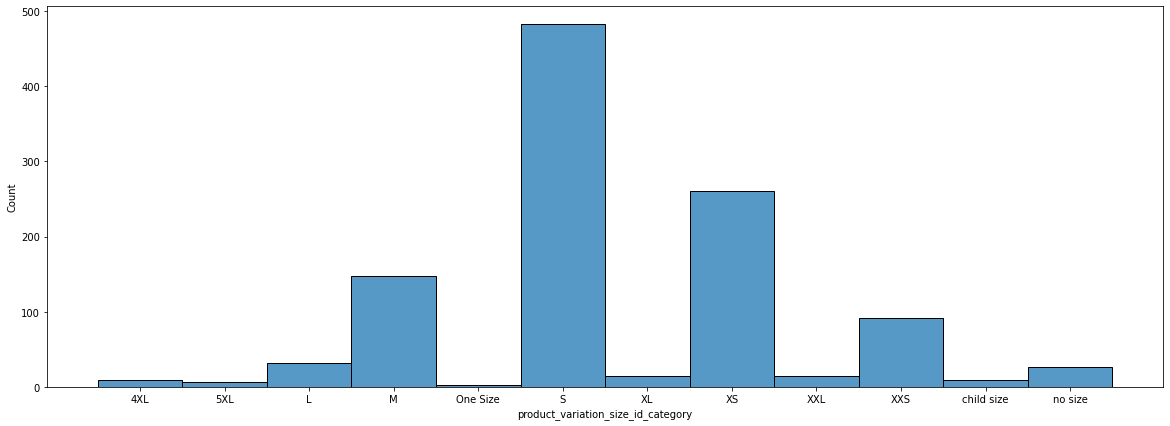

In [ ]:
conditions = [
    df_caregorical["product_variation_size_id"].isin(['M', 'Size M', 'M.' , '100 x 100cm(39.3 x 39.3inch)', '10 ml' , 'Women Size 36', '100 cm']),
    df_caregorical["product_variation_size_id"].isin(['L' , '26(Waist 72cm 28inch)' ,'SizeL']),
    df_caregorical["product_variation_size_id"].isin(['XS' , 'XS.' , '35' , 'Size-XS' , 'SIZE XS' ]),
    df_caregorical["product_variation_size_id"].isin(['S' , 'S.' , 'S(bust 88cm)' , 's', '25-S', 'Size S', 'Size-S', '25', 'S (waist58-62cm)', 'S Pink' , 'US-S', 'pants-S' , 'Size S.', 'S..' , 'size S', 'Size/S', 'Suit-S' , 'SIZE S']),
    df_caregorical["product_variation_size_id"].isin(['XXS' ,'Size-XXS' , 'SIZE XXS' , 'Size -XXS' , '34', 'Size XXS' , 'SIZE-XXS','33','XXXS','29']),
    df_caregorical["product_variation_size_id"].isin(['XXL' , '2XL' ]),
    df_caregorical["product_variation_size_id"].isin(['4XL' , '04-3XL' , 'XXXXL' , 'Size4XL' , '1m by 3m']),
    df_caregorical["product_variation_size_id"].isin(['1' , 'One Size' ]),
    df_caregorical["product_variation_size_id"].isin(['X   L' , '1 PC - XL','XL']),
    df_caregorical["product_variation_size_id"].isin(['6XL' ,'XXXXXL','Size-5XL','5XL','60']),
    df_caregorical["product_variation_size_id"].isin([ 'S/M(child)' , 'Floating Chair for Kid' , '4-5 Years' , '5', '2' , 'B','Baby Float Boat','40 cm','30 cm'])
]

choices = ['M','L','XS', 'S','XXS','XXL','4XL','One Size','XL','5XL','child size']
# if the first condition is true the crossbonding first index in list choices will be excuted
df_caregorical['product_variation_size_id_category'] = np.select(conditions, choices, default='no size')
# convert from categorical to numerical
df_caregorical["product_variation_size_id_category"] = pd.Categorical(df_caregorical["product_variation_size_id_category"])
df_caregorical['product_variation_size_id_category_int'] = df_caregorical["product_variation_size_id_category"].cat.codes

plt.figure(figsize=(20,7))
sns.histplot(df_caregorical["product_variation_size_id_category"])


In [ ]:
len(df_caregorical["product_variation_size_id_category"].unique())

12

<Axes: xlabel='product_variation_size_id_category_more', ylabel='Count'>

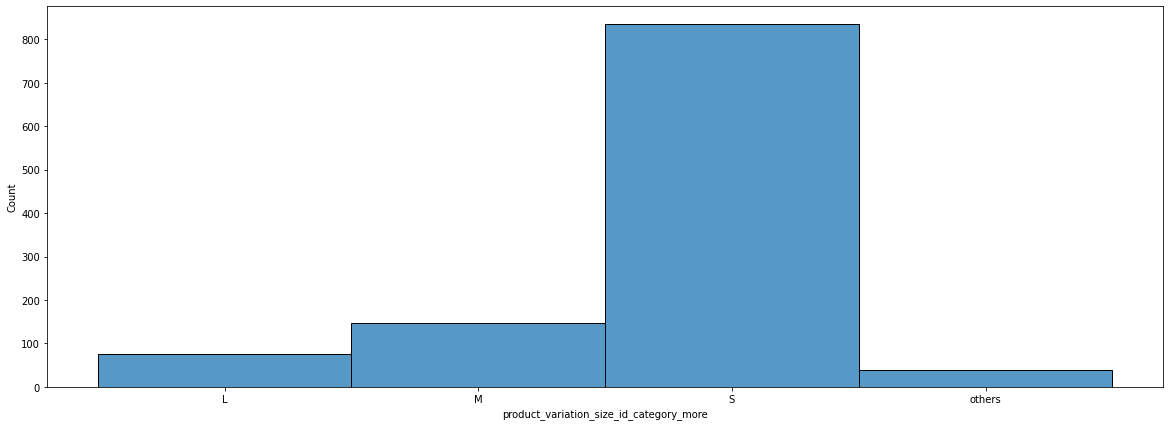

In [ ]:
# more modifications
# Tried to reduce the numbers of groups ASAP

conditions = [
    df_caregorical["product_variation_size_id"].isin(['M', 'Size M', 'M.' , '100 x 100cm(39.3 x 39.3inch)', '10 ml' , 'Women Size 36', '100 cm']),
    df_caregorical["product_variation_size_id"].isin(['L' , '26(Waist 72cm 28inch)' ,'SizeL','X   L' , '1 PC - XL','XL','XXL' , '2XL','6XL' ,'XXXXXL','Size-5XL','5XL','60','4XL' , '04-3XL' , 'XXXXL' , 'Size4XL' , '1m by 3m']),
    df_caregorical["product_variation_size_id"].isin(['S' , 'S.' , 'S(bust 88cm)' , 's', '25-S', 'Size S', 'Size-S', '25', 'S (waist58-62cm)', 'S Pink' , 'US-S', 'pants-S' , 'Size S.', 'S..' , 'size S', 'Size/S', 'Suit-S' , 'SIZE S','XS' , 'XS.' , '35' , 'Size-XS' , 'SIZE XS','XXS' ,'Size-XXS' , 'SIZE XXS' , 'Size -XXS' , '34', 'Size XXS' , 'SIZE-XXS','33','XXXS','29']),
    df_caregorical["product_variation_size_id"].isin([ 'S/M(child)' , 'Floating Chair for Kid' , '4-5 Years' , '5', '2' , 'B','Baby Float Boat','40 cm','30 cm','1' , 'One Size'])
]

choices = ['M','L', 'S','others']
# if the first condition is true the crossbonding first index in list choices will be excuted
df_caregorical['product_variation_size_id_category_more'] = np.select(conditions, choices, default='others')
# convert from categorical to numerical
df_caregorical["product_variation_size_id_category_more"] = pd.Categorical(df_caregorical["product_variation_size_id_category_more"])
df_caregorical['product_variation_size_id_category_int_more'] = df_caregorical["product_variation_size_id_category_more"].cat.codes

plt.figure(figsize=(20,7))
# better distribution so I expect better result when selecting it
sns.histplot(df_caregorical["product_variation_size_id_category_more"])

In [ ]:
# the coloumn about crawl_month because it's unique value '2020-08'. Fixed doesn't affect on rating.

len(df_caregorical["crawl_month"].unique())
df_caregorical["crawl_month"].unique()

array(['2020-08'], dtype=object)

In [ ]:
# the coloumn about theme because it's unique value 'summer'. Fixed doesn't affect on rating.

len(df_caregorical["theme"].unique())
df_caregorical["theme"].unique()

array(['summer'], dtype=object)

In [ ]:
len(df_caregorical["origin_country"].unique())
df_caregorical["origin_country"].unique()

array(['CN', 'US', 'GB', nan, 'SG', 'VE'], dtype=object)

<Axes: xlabel='origin_country', ylabel='Count'>

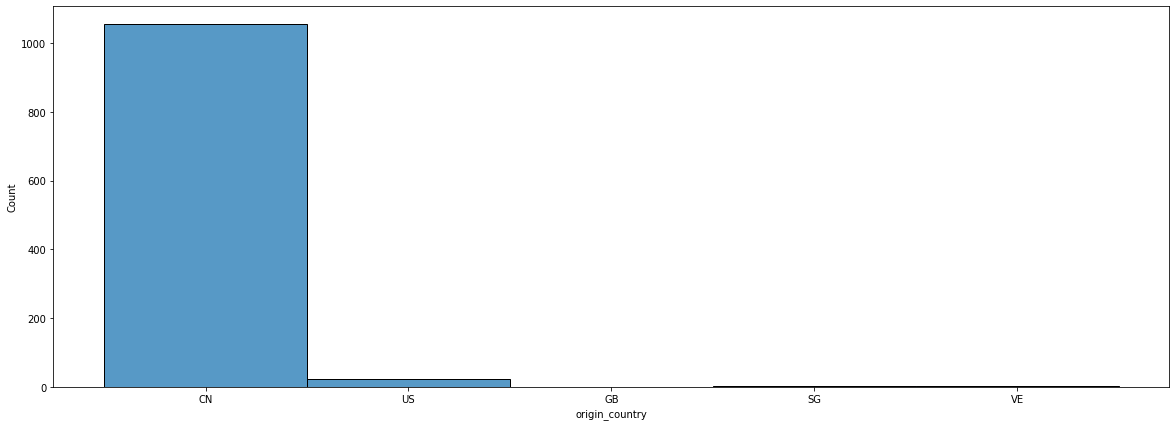

In [ ]:
plt.figure(figsize=(20,7))
# most of them are from Canada
sns.histplot(df_caregorical["origin_country"])

In [ ]:
df_caregorical["origin_country"] = pd.Categorical(df_caregorical["origin_country"])
df_caregorical['origin_country_int'] = df_caregorical["origin_country"].cat.codes

<Axes: xlabel='origin_country_category_more', ylabel='Count'>

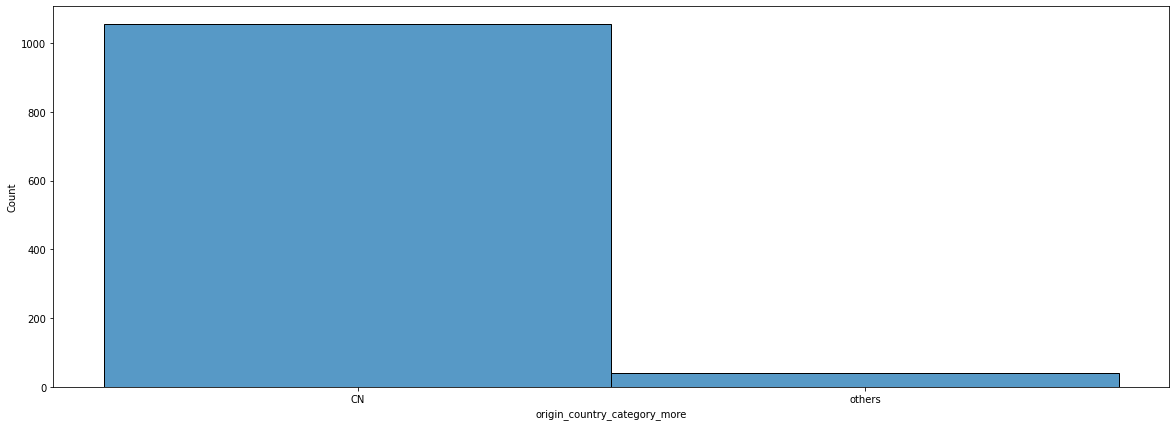

In [ ]:
# More modification
# Tried to reduce the numbers of groups ASAP

conditions = [
    df_caregorical["origin_country"].eq('CN')
]
# if the first condition is true the crossbonding first index in list choices will be excuted
choices = ['CN']

df_caregorical['origin_country_category_more'] = np.select(conditions, choices, default='others')
# convert from categorical to numerical
df_caregorical["origin_country_category_more"] = pd.Categorical(df_caregorical["origin_country_category_more"])
df_caregorical['origin_country_int_more'] = df_caregorical["origin_country_category_more"].cat.codes

plt.figure(figsize=(20,7))
# better distribution so I expect better result when selecting it
sns.histplot(df_caregorical["origin_country_category_more"])

Selected categorical features : product_color_int & product_variation_size_id_category_int & origin_country_int

# Same for testing data

In [ ]:
test['discount_price_more'] = test['retail_price'] - test['price']+ 5

In [ ]:
test["product_color"] = test["product_color"].str.lower().str.replace('&','').astype(str).str.replace(" ", "").str.replace("blackwhite", "whiteblack").str.replace("pinkblue","bluepink")

In [ ]:
conditions = [
    test["product_color"].isin(['black', 'coolblack']),
    test["product_color"].isin(['lakeblue' , 'blue' ,'navyblue' , 'lightblue' , 'skyblue' , 'navybluewhite', 'darkblue' , 'denimblue']),
    test["product_color"].isin(['whitegreen' , 'armygreen' , 'mintgreen' , 'lightgreen' , 'darkgreen' , 'applegreen', 'green' , 'fluorescentgreen']),
    test["product_color"].isin(['lightpink' , 'pink' , 'dustypink' , 'rosegold']),
    test["product_color"].isin(['grey' , 'gray' , 'lightgrey' , 'silver' , 'lightgray' ]),
    test["product_color"].isin(['lightyellow' , 'wineredyellow' , 'yellow' , 'khaki']),
    test["product_color"].isin(['lightred' , 'red' , 'watermelonred' , 'winered' , 'rosered' , 'rose' , 'burgundy' , 'claret']),
    test["product_color"].isin(['offwhite' , 'white' , 'whitefloral' , 'navy' , 'ivory' ]),
    test["product_color"].isin(['coffee' , 'brown' , 'beige' , 'nude' , 'brownyellow']),
    test["product_color"].isin(['apricot' , 'orange' , 'camel' , 'gold' , 'orange-red']),
    test["product_color"].isin(['purple','violet','wine']),
    test["product_color"].isin(['leopardprint' , 'camouflage' , 'whitestripe' , 'rainbow' , 'floral' , 'army' , 'leopard' , 'star']),
    test["product_color"].isin(['blackyellow' , 'blackblue' , 'blackgreen' ]),
    test["product_color"].isin(['pinkgrey' , 'bluepink' , 'pinkblack' , 'pinkwhite']),
    test["product_color"].eq('whiteblack'),
    test["product_color"].eq('multicolor')
]

choices = ['black','blue','green', 'pink','grey','yellow','red','white','brown','orange','purple','striped' ,'black with color' ,'pink with color' ,'whiteblack','multicolor']
# if the first condition is true the crossbonding first index in list choices will be excuted
test['product_color_category'] = np.select(conditions, choices, default='no color')
# convert from categorical to numerical
test["product_color_category"] = pd.Categorical(test["product_color_category"])
test['product_color_int'] = test["product_color_category"].cat.codes

In [ ]:
# More modification
# Tried to reduce the numbers of groups ASAP

conditions = [
    test["product_color"].isin(['black', 'coolblack','blackyellow' , 'blackblue' , 'blackgreen','grey' , 'gray' , 'lightgrey' , 'silver' , 'lightgray']),
    test["product_color"].isin(['lakeblue' , 'blue' ,'navyblue' , 'lightblue' , 'skyblue' , 'navybluewhite', 'darkblue' , 'denimblue']),
    test["product_color"].isin(['whitegreen' , 'armygreen' , 'mintgreen' , 'lightgreen' , 'darkgreen' , 'applegreen', 'green' , 'fluorescentgreen']),
    test["product_color"].isin(['lightpink' , 'pink' , 'dustypink' , 'rosegold','pinkgrey' , 'bluepink' , 'pinkblack' , 'pinkwhite','lightred' , 'red' , 'watermelonred' , 'winered' , 'rosered' , 'rose' , 'burgundy' , 'claret','purple','violet','wine']),
    test["product_color"].isin(['lightyellow' , 'wineredyellow' , 'yellow' , 'khaki','apricot' , 'orange' , 'camel' , 'gold' , 'orange-red','coffee' , 'brown' , 'beige' , 'nude' , 'brownyellow']),
    test["product_color"].isin(['offwhite' , 'white' , 'whitefloral' , 'navy' , 'ivory' ]),
    test["product_color"].isin(['leopardprint' , 'camouflage' , 'whitestripe' , 'rainbow' , 'floral' , 'army' , 'leopard' , 'star','multicolor','whiteblack'])
]

choices = ['black','blue','green', 'pink_red_purple','yellow_orange_brown','white','striped']
# if the first condition is true the crossbonding first index in list choices will be excuted
test['product_color_category_more'] = np.select(conditions, choices, default='no color')
# convert from categorical to numerical
test["product_color_category_more"] = pd.Categorical(test["product_color_category_more"])
test['product_color_int_more'] = test["product_color_category_more"].cat.codes

In [ ]:
conditions = [
    test["product_variation_size_id"].isin(['M', 'Size M', 'M.' , '100 x 100cm(39.3 x 39.3inch)', '10 ml' , 'Women Size 36', '100 cm']),
    test["product_variation_size_id"].isin(['L' , '26(Waist 72cm 28inch)' ,'SizeL']),
    test["product_variation_size_id"].isin(['XS' , 'XS.' , '35' , 'Size-XS' , 'SIZE XS' ]),
    test["product_variation_size_id"].isin(['S' , 'S.' , 'S(bust 88cm)' , 's', '25-S', 'Size S', 'Size-S', '25', 'S (waist58-62cm)', 'S Pink' , 'US-S', 'pants-S' , 'Size S.', 'S..' , 'size S', 'Size/S', 'Suit-S' , 'SIZE S']),
    test["product_variation_size_id"].isin(['XXS' ,'Size-XXS' , 'SIZE XXS' , 'Size -XXS' , '34', 'Size XXS' , 'SIZE-XXS','33','XXXS','29']),
    test["product_variation_size_id"].isin(['XXL' , '2XL' ]),
    test["product_variation_size_id"].isin(['4XL' , '04-3XL' , 'XXXXL' , 'Size4XL' , '1m by 3m']),
    test["product_variation_size_id"].isin(['1' , 'One Size' ]),
    test["product_variation_size_id"].isin(['X   L' , '1 PC - XL','XL']),
    test["product_variation_size_id"].isin(['6XL' ,'XXXXXL','Size-5XL','5XL','60']),
    test["product_variation_size_id"].isin([ 'S/M(child)' , 'Floating Chair for Kid' , '4-5 Years' , '5', '2' , 'B','Baby Float Boat','40 cm','30 cm'])
]

choices = ['M','L','XS', 'S','XXS','XXL','4XL','One Size','XL','5XL','child size']
# if the first condition is true the crossbonding first index in list choices will be excuted
test['product_variation_size_id_category'] = np.select(conditions, choices, default='no size')
# convert from categorical to numerical
test["product_variation_size_id_category"] = pd.Categorical(test["product_variation_size_id_category"])
test['product_variation_size_id_category_int'] = test["product_variation_size_id_category"].cat.codes

In [ ]:
# more modifications
# Tried to reduce the numbers of groups ASAP

conditions = [
    test["product_variation_size_id"].isin(['M', 'Size M', 'M.' , '100 x 100cm(39.3 x 39.3inch)', '10 ml' , 'Women Size 36', '100 cm']),
    test["product_variation_size_id"].isin(['L' , '26(Waist 72cm 28inch)' ,'SizeL','X   L' , '1 PC - XL','XL','XXL' , '2XL','6XL' ,'XXXXXL','Size-5XL','5XL','60','4XL' , '04-3XL' , 'XXXXL' , 'Size4XL' , '1m by 3m']),
    test["product_variation_size_id"].isin(['S' , 'S.' , 'S(bust 88cm)' , 's', '25-S', 'Size S', 'Size-S', '25', 'S (waist58-62cm)', 'S Pink' , 'US-S', 'pants-S' , 'Size S.', 'S..' , 'size S', 'Size/S', 'Suit-S' , 'SIZE S','XS' , 'XS.' , '35' , 'Size-XS' , 'SIZE XS','XXS' ,'Size-XXS' , 'SIZE XXS' , 'Size -XXS' , '34', 'Size XXS' , 'SIZE-XXS','33','XXXS','29']),
    test["product_variation_size_id"].isin([ 'S/M(child)' , 'Floating Chair for Kid' , '4-5 Years' , '5', '2' , 'B','Baby Float Boat','40 cm','30 cm','1' , 'One Size'])
]

choices = ['M','L', 'S','others']
# if the first condition is true the crossbonding first index in list choices will be excuted
test['product_variation_size_id_category_more'] = np.select(conditions, choices, default='others')
# convert from categorical to numerical
test["product_variation_size_id_category_more"] = pd.Categorical(test["product_variation_size_id_category_more"])
test['product_variation_size_id_category_int_more'] = test["product_variation_size_id_category_more"].cat.codes

In [ ]:
test["origin_country"] = pd.Categorical(test["origin_country"])
test['origin_country_int'] = test["origin_country"].cat.codes

In [ ]:
# More modification
# Tried to reduce the numbers of groups ASAP

conditions = [
    test["origin_country"].eq('CN')
]

choices = ['CN']
# if the first condition is true the crossbonding first index in list choices will be excuted
test['origin_country_category_more'] = np.select(conditions, choices, default='others')
# convert from categorical to numerical
test["origin_country_category_more"] = pd.Categorical(test["origin_country_category_more"])
test['origin_country_int_more'] = test["origin_country_category_more"].cat.codes

# Splitting and Standraization

- When I try to use data with spiliting. It didn't perform well as expected because it's actually a small data with high level noisy.

- For Standraization, it performed well for SVM as expected but for other models no effect.

In [ ]:
## Select the most features have relation with the outputs in training
all_correlated_features_data=pd.concat([df_numeric[["price", "badges_count","badge_product_quality","shipping_option_price","merchant_rating","discount_price"]],df_caregorical[['product_color_int' , 'product_variation_size_id_category_int', 'origin_country_int']]],axis=1)
# input
x = all_correlated_features_data
# output
y = train['rating']

In [ ]:
test['discount_price']=test['retail_price'] - test['price']

In [ ]:
## Select the most features have relation with the outputs in testing
all_correlated_features_test = pd.concat([test[["price", "badges_count","badge_product_quality","shipping_option_price","merchant_rating","discount_price"]],test[['product_color_int' , 'product_variation_size_id_category_int', 'origin_country_int']]],axis=1)
x_test = all_correlated_features_test

In [ ]:
# using the train test split function
x_train, x_valid, y_train, y_valid = train_test_split(x,y,
                                   random_state=104,
                                   test_size=0.1,
                                   shuffle=True)

In [ ]:
#standardization
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_valid_scaled = sc.fit_transform(x_valid)
x_test_scaled = sc.transform(x_test)

# Let's try different approaches

# Thoughts and observations for trial 0, plan for trial 1

- First approach is to select most correlated numerical features with the categorical features that make sense with SVM model and with validation split 10%.

The expected result is to get a score higher than 60% because I select the most important features and remove the non columns also the fixed value coloumns.

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
y_predicted=clf.predict(x_valid)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_predicted))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_valid, y_predicted,average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_valid, y_predicted,average='micro'))


# Model Recall: what percentage of positive tuples are labelled as such?
print("f1_score:",metrics.f1_score(y_valid, y_predicted,average='micro'))

Accuracy: 0.7454545454545455
Precision: 0.7454545454545455
Recall: 0.7454545454545455
f1_score: 0.7454545454545455


# thoughts and observations for trial 1, plan for trial 2

#### Observations:
The result is 75% on Kaggle. It's good as expected but maybe there are some features like discount_price better to remove it because it has many negative values also features like origin_country because most of them is CA. Also we can apply grid search to get the best hyperparameters. Also my data is imbalanced and SVM is sensitive to imbalance data and misclassify the minority class.


# Second approach

- Same features but with different model Desision tree

For this approach, we can use another model. It may get better result.
The expected result to be higher than 60%. I hope to get higher than SVM.

In [ ]:
# Create Decision Tree classifer object
DT = DecisionTreeClassifier()

# Train Decision Tree Classifer
DT = DT.fit(x_train_scaled,y_train)

#Predict the response for test dataset
y_pred_DT = DT.predict(x_valid_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred_DT))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_valid, y_pred_DT,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_valid, y_pred_DT,average='macro'))


# Model Recall: what percentage of positive tuples are labelled as such?
print("f1_score:",metrics.f1_score(y_valid, y_pred_DT,average='macro'))

Accuracy: 0.6181818181818182
Precision: 0.30687726039783003
Recall: 0.303125
f1_score: 0.3029350104821803


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test['rating_DT']=DT.predict(x_test_scaled)

In [ ]:
df = pd.DataFrame({'id' : test['id'], 'rating': test['rating_DT']})
df.to_csv('submision_DT.csv', index=False,)

# thoughts and observations for trial 2, plan for trial 3

### Observations:
The result is 64% on Kaggle. It seems that the SVM work better than decision tree. That's because little samples with little features has high noisy and also decision tree is a baised tree for imbalnce data.Also the model is so simple. That's way I may get these result.

# Third approach

## For this approach, we can use another model. It may get better result.
The expected result to be higher than 50%. I hope to get higher than Desicion tree and SVM because naive bayes hasn't any problem with imbalance data but I don't think so because it's so simple.

In [ ]:
# Build a Gaussian Classifier
NB = GaussianNB()

# Model training
NB.fit(x_train_scaled, y_train)

# Predict Output
predicted_NB = NB.predict(x_valid_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, predicted_NB))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_valid, predicted_NB,average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_valid, predicted_NB,average='micro'))


# Model Recall: what percentage of positive tuples are labelled as such?
print("f1_score:",metrics.f1_score(y_valid, predicted_NB,average='micro'))

Accuracy: 0.6636363636363637
Precision: 0.6636363636363637
Recall: 0.6636363636363637
f1_score: 0.6636363636363637


In [ ]:
test['rating_NB']=DT.predict(x_test_scaled)

In [ ]:
df = pd.DataFrame({'id' : test['id'], 'rating': test['rating_NB']})
df.to_csv('submision_NB.csv', index=False,)

# thoughts and observations for trial 3, plan for trial 4

#Observations:

The result is 59% on Kaggle. It seems that the SVM work better than decision tree and Naive Bayes. I think these because the model assume the features are independent. but you can see that there are highly dependent and also it's a simple model.

# Forth approach:
- Select different columns: "price", "badges_count","badge_product_quality","shipping_option_price","merchant_rating", 'product_color_int', 'product_variation_size_id'

- Apply GridSearch

- Use SVM model

The expected result is to be higher than the first approach about 5-10 % as we didn't modify so much just not select 2 coloumns and apply grid search.

## Grid Search

In [ ]:
accuracies = []
aucs = []
f1scores = []
models = []
labels = []

def get_metrics (y_test,y_pred):
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

  # Model Precision: what percentage of positive tuples are labeled as such?
  print("Precision:",metrics.precision_score(y_test, y_pred,average='micro'))

  # Model Recall: what percentage of positive tuples are labelled as such?
  print("Recall:",metrics.recall_score(y_test, y_pred,average='micro'))


  # Model Recall: what percentage of positive tuples are labelled as such?
  print("f1_score:",metrics.f1_score(y_test, y_pred,average='micro'))

In [ ]:
def classificationReport(model, X_test, y_test):
  y_pred = model.predict(X_test)
  # Store Metrics
  accuracy = model.score(X_test, y_test)
  f1score = f1_score(y_test, y_pred)
  accuracies.append(accuracy)
  f1scores.append(f1score)
  # Classification Report
  print(classification_report(y_test, y_pred))
  print()
  # Precision Vs Recall curve
  precision, recall, _ = precision_recall_curve(y_test, y_pred)
  PrecisionRecallDisplay(precision = precision, recall = recall).plot()
  plt.title('Precision Vs Recall')
  plt.show()
  print()
  # ROC/AUC
  fpr, tpr, _ = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)
  RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = model.__class__.__name__).plot()
  plt.title('ROC/AUC')
  plt.show()
  print()
  conf_matrix = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = model.classes_).plot()
  plt.title('Confusion Matrix')
  plt.show()


def gridSearch(model, parameters):
  kfold = 5
  scoring = 'accuracy'
  verbose = 5

  grid_search = GridSearchCV(estimator = model, param_grid = parameters, cv = kfold, scoring = scoring, verbose = verbose)
  grid_search.fit(x, y)
  results = pd.DataFrame(grid_search.cv_results_)
  best_model = grid_search.best_estimator_
  model_name = best_model.__class__.__name__
  models.append(best_model)
  labels.append(model_name)
  print('##########')
  print()
  print(f'{model_name}')
  print('##########')
  print()
  print('After running the grid search with cross validation we found that the best Hyper-Parameter are :')
  print()
  print(grid_search.best_params_)
  print('##########')
  print()
  print('Grid Search Summary :')
  print()
  display(results.sort_values(by=['rank_test_score']).head())
  print('##########')
  print()
  model_scores = results.filter(regex=r"split\d*_test_score")
  print()
  return best_model

In [ ]:
parameters = {'kernel':['rbf', 'poly'],
              'degree':list(range(2, 5)),
              'C':[1e-3, 1e-2, 1, 1e2, 1e3]}

svm = gridSearch(SVC(), parameters)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.708 total time=   0.0s
[CV 2/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.708 total time=   0.0s
[CV 3/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.708 total time=   0.0s
[CV 4/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.708 total time=   0.0s
[CV 5/5] END .....C=0.001, degree=2, kernel=rbf;, score=0.706 total time=   0.0s
[CV 1/5] END ....C=0.001, degree=2, kernel=poly;, score=0.708 total time=   0.0s
[CV 2/5] END ....C=0.001, degree=2, kernel=poly;, score=0.708 total time=   0.0s
[CV 3/5] END ....C=0.001, degree=2, kernel=poly;, score=0.708 total time=   0.1s
[CV 4/5] END ....C=0.001, degree=2, kernel=poly;, score=0.708 total time=   0.0s
[CV 5/5] END ....C=0.001, degree=2, kernel=poly;, score=0.706 total time=   0.0s
[CV 1/5] END .....C=0.001, degree=3, kernel=rbf;, score=0.708 total time=   0.1s
[CV 2/5] END .....C=0.001, degree=3, kernel=rbf;, score=0.708 total time=   0.1s
[CV 3/5] END .....C=0.001, d

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,80.769317,59.962189,0.007969,0.001854,1000.0,3,poly,"{'C': 1000.0, 'degree': 3, 'kernel': 'poly'}",0.726027,0.716895,0.721461,0.735160,0.720183,0.723945,0.006327,1
25,90.652026,52.913665,0.007000,0.000216,1000.0,2,poly,"{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}",0.721461,0.703196,0.726027,0.730594,0.724771,0.721210,0.009471,2
26,0.409741,0.063611,0.009691,0.000277,1000.0,3,rbf,"{'C': 1000.0, 'degree': 3, 'kernel': 'rbf'}",0.703196,0.703196,0.716895,0.712329,0.743119,0.715747,0.014678,3
24,0.407620,0.058911,0.010714,0.002228,1000.0,2,rbf,"{'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}",0.703196,0.703196,0.716895,0.712329,0.743119,0.715747,0.014678,3
28,0.450533,0.137988,0.011951,0.003195,1000.0,4,rbf,"{'C': 1000.0, 'degree': 4, 'kernel': 'rbf'}",0.703196,0.703196,0.716895,0.712329,0.743119,0.715747,0.014678,3


##########




In [ ]:
svm.fit(x_train_scaled, y_train)

SVC(C=1000.0, kernel='poly')

In [ ]:
y_predicted_svm=svm.predict(x_valid_scaled)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_predicted_svm))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_valid, y_predicted_svm,average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_valid, y_predicted_svm,average='micro'))


# Model Recall: what percentage of positive tuples are labelled as such?
print("f1_score:",metrics.f1_score(y_valid, y_predicted_svm,average='micro'))

Accuracy: 0.7
Precision: 0.7
Recall: 0.7
f1_score: 0.7


# thoughts and observations for trial 4, plan for trial 5

## Observation:
I got on kaggle 75%. Despite applying grid search but it didn't work well as expected. I think if I use more features will be better. Also SVM is simple and sensitive to the class imbalance.

## Fifth Approach:
- I have used the same previous model but I remove the preprosessed columns. I think I will get a better result.

In [ ]:
x_train_2 = x_train.drop(['origin_country_int','discount_price','product_variation_size_id_category_int','product_color_int'], axis=1)
x_valid_2 = x_valid.drop(['origin_country_int','discount_price','product_variation_size_id_category_int','product_color_int'], axis=1)
x_test_2 = x_test.drop(['origin_country_int','discount_price','product_variation_size_id_category_int','product_color_int'], axis=1)

In [ ]:
svm.fit(x_train_2, y_train)

SVC(C=1000.0, kernel='poly')

In [ ]:
y_predicted_svm_2=svm.predict(x_valid_2)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_predicted_svm_2))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_valid, y_predicted_svm_2,average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_valid, y_predicted_svm_2,average='micro'))


# Model Recall: what percentage of positive tuples are labelled as such?
print("f1_score:",metrics.f1_score(y_valid, y_predicted_svm_2,average='micro'))

Accuracy: 0.7272727272727273
Precision: 0.7272727272727273
Recall: 0.7272727272727273
f1_score: 0.7272727272727273


In [ ]:
test['rating_SVM_G']=svm.predict(x_test_2)

df = pd.DataFrame({'id' : test['id'], 'rating': test['rating_SVM_G']})
df.to_csv('submision_SVM_G.csv', index=False,)

# thoughts and observations for trial 5, plan for trial 6

## Observations:

I got 77% better result. I think these removed features need to be cleaned more.

## Trial with different features

I think these the only option when I change it it affect so much so let's try.

In [ ]:
train = train[train['rating']<=5]

In [ ]:
train

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,...,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,...,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,...,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,...,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


In [ ]:
df_numeric = df_numeric[df_numeric['rating']<=5]

In [ ]:
df_numeric

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id,discount_price,discount_price_more
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,0,30,50,NaN,66644,4.137582,1,272,-1.00,4.00
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,0,37,50,NaN,25752,4.256873,0,1515,-1.00,4.00
2,6.00,34,100,0,4.0,10,0,0,0,0,...,0,41,50,NaN,3897,3.928920,0,940,28.00,33.00
3,4.67,4,100,1,3.0,82,0,0,0,0,...,0,25,50,NaN,7497,4.079365,0,309,-0.67,4.33
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,0,15,50,1.0,173,4.306358,0,226,3.00,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,...,0,41,50,NaN,230951,4.311066,0,1381,0.00,5.00
1090,5.00,5,1000,0,5.0,377,1,0,1,0,...,0,35,50,NaN,2904,4.422521,0,212,0.00,5.00
1091,9.00,48,1000,1,4.0,135,0,0,0,0,...,0,25,50,NaN,6632,3.748794,0,163,39.00,44.00
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,...,0,45,50,1.0,5816,3.936382,0,674,-1.00,4.00


In [ ]:
x_train_2 = df_numeric[['price', 'retail_price','units_sold', 'uses_ad_boosts','rating_count','badges_count','badge_local_product','badge_product_quality','badge_fast_shipping','merchant_has_profile_picture','merchant_rating', 'merchant_rating_count','inventory_total']]
# x_valid_2 = x_valid.drop(['origin_country_int','discount_price','product_variation_size_id_category_int','product_color_int'], axis=1)
x_test_2 = test[['price', 'retail_price','units_sold', 'uses_ad_boosts','rating_count','badges_count','badge_local_product','badge_product_quality','badge_fast_shipping','merchant_has_profile_picture','merchant_rating', 'merchant_rating_count','inventory_total']]

In [ ]:
y_train = train['rating']
y_train

0       4.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
1089    4.0
1090    5.0
1091    4.0
1092    4.0
1093    3.0
Name: rating, Length: 1093, dtype: float64

In [ ]:
svm.fit(x_train_2, y_train)

SVC(C=1000.0, kernel='poly')

In [ ]:
test['rating_SVM_G_alldata_numfeat']=svm.predict(x_test_2)

df = pd.DataFrame({'id' : test['id'], 'rating': test['rating_SVM_G_alldata_numfeat']})
df.to_csv('submision_SVM_G_alldata_numfeat.csv', index=False,)

## Sixth Approach: Desision tree with grid search. Result on kaggle 77%

In [ ]:
parameters = {'criterion':['gini', 'entropy'],
              'max_depth':range(8, 15),
              'min_samples_split':[5, 10, 20]}

d_tree = gridSearch(DecisionTreeClassifier(), parameters)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.726 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.740 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.721 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_split=5;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.726 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.708 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.703 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.731 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, min_samples_split=10;, score=0.729 to

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 3/5] END criterion=gini, max_depth=9, min_samples_split=20;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, min_samples_split=20;, score=0.717 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, min_samples_split=20;, score=0.729 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_split=5;, score=0.717 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_split=5;, score=0.717 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_split=5;, score=0.731 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_split=5;, score=0.712 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_split=5;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_split=10;, score=0.708 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_split=10;, score=0.708 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.005635,0.001407,0.001929,0.000427,entropy,8,5,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.739726,0.721461,0.730594,0.707763,0.752294,0.730367,0.015223,1
0,0.005810,0.001992,0.001969,0.000391,gini,8,5,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.716895,0.726027,0.739726,0.721461,0.747706,0.730363,0.011558,2
3,0.004857,0.000087,0.001699,0.000031,gini,9,5,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.712329,0.703196,0.730594,0.730594,0.747706,0.724884,0.015582,3
6,0.004515,0.000177,0.001673,0.000077,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.716895,0.716895,0.730594,0.712329,0.743119,0.723966,0.011368,4
1,0.004590,0.000142,0.001720,0.000112,gini,8,10,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.726027,0.707763,0.703196,0.730594,0.729358,0.719388,0.011544,5


##########




In [ ]:
x_corr_feat = train[['badge_product_quality', 'price', 'badges_count', 'merchant_rating', 'shipping_option_price']]

In [ ]:
train=train[train['rating']<=5]
y=train['rating']

In [ ]:
d_tree.fit(x_corr_feat, y)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=5)

In [ ]:
x_test_corr_feat = x_test[['badge_product_quality', 'price', 'badges_count', 'merchant_rating', 'shipping_option_price']]

In [ ]:
test['rating_DT_G_alldata_corrfeat']=d_tree.predict(x_test_corr_feat)

df = pd.DataFrame({'id' : test['id'], 'rating': test['rating_DT_G_alldata_corrfeat']})
df.to_csv('submision_DT_G_alldata_corrfeat_reomve_6.csv', index=False,)

# Observations: When I apply grid search that make decision tree becaome higher in about 5 degrees which it so great.


# Try Random Forest

The way I use it because it's strong model not be baised to the majority class like decsision tree and SVM and not necessary to have independent features like naive bayes. so it's supposed to get result in range 80%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [ ]:
x_rf = pd.concat([df_numeric[["price", "badges_count","badge_product_quality","shipping_option_price","merchant_rating","discount_price_more"]],df_caregorical[['product_color_int_more' , 'product_variation_size_id_category_int_more', 'origin_country_int_more']]],axis=1)
x_rf = x_rf.dropna()
train = train[train['rating']<=5]
y = train[['rating']]

In [ ]:
CV_rfc.fit(x_rf, y)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
test

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,product_variation_size_id_category_int_more,origin_country_int,origin_country_category_more,origin_country_int_more,discount_price,rating_DT,rating_NB,rating_SVM_G,rating_SVM_G_alldata_numfeat,rating_DT_G_alldata_corrfeat
0,5.75,5,EUR,10,1,0,0,0,0,0,...,2,1,CN,0,-0.75,4.0,4.0,3.0,4.0,5.0
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,2,1,CN,0,0.00,5.0,5.0,4.0,4.0,4.0
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,2,1,CN,0,11.00,4.0,4.0,4.0,4.0,4.0
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,1,1,CN,0,9.00,5.0,5.0,4.0,4.0,4.0
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,1,1,CN,0,69.00,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,EUR,100,1,27,0,0,0,0,...,1,3,others,1,-2.00,4.0,4.0,4.0,4.0,3.0
475,6.00,17,EUR,5000,1,817,0,0,0,0,...,2,1,CN,0,11.00,4.0,4.0,4.0,4.0,4.0
476,4.83,51,EUR,50,1,1,0,0,0,0,...,2,3,others,1,46.17,4.0,4.0,4.0,4.0,2.0
477,3.00,3,EUR,100,1,8,0,0,0,0,...,2,1,CN,0,0.00,5.0,5.0,4.0,4.0,4.0


In [ ]:
x_test_rf_G = pd.concat([test[["price", "badges_count","badge_product_quality","shipping_option_price","merchant_rating","discount_price_more"]],test[['product_color_int_more' , 'product_variation_size_id_category_int_more', 'origin_country_int_more']]],axis=1)

In [ ]:
test['rating_rf_G_alldata_corrfeat_modified_more']=CV_rfc.predict(x_test_rf_G)

df = pd.DataFrame({'id' : test['id'], 'rating': test['rating_rf_G_alldata_corrfeat_modified_more']})
df.to_csv('submision_rf_G_alldata_corrfeat_modified_more.csv', index=False,)

# Observations:
For Random forest it's supposed to get result higher than that but I think the problem of imbalnce data may affect

# trial different features

In [ ]:
CV_rfc.fit(x_corr_feat, y)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
test['rating_rf_G_alldata_corrfeatonly']=CV_rfc.predict(x_test_corr_feat)

df = pd.DataFrame({'id' : test['id'], 'rating': test['rating_rf_G_alldata_corrfeatonly']})
df.to_csv('submision_rf_G_alldata_corrfeatonly.csv', index=False,)

# Result on Kaggle 76%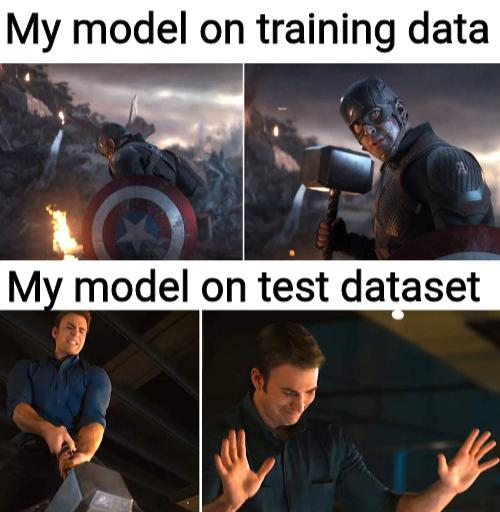

# ✔️ Answer the questions below (briefly):


# 1. Why Data Mining is a misnomer? What is another preferred name?

Data Mining is considered a misnomer because it implies that the process is solely about extracting data from a source, when in reality, it involves much more than just that. Data mining involves various steps such as data cleaning, data integration, data transformation, and data analysis to extract useful insights and knowledge from the data.

Another preferred name for data mining is Knowledge Discovery in Databases (KDD), as it more accurately describes the process of extracting useful information and knowledge from large datasets. KDD emphasizes the importance of discovering patterns, relationships, and trends in the data that can be used for decision-making and problem-solving.

# 2. What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?

The general knowledge discovery process includes the following steps:

1. Data Selection: Determining which data to use for analysis.

2. Data Cleaning: Identifying and correcting errors or inconsistencies in the data.

3. Data Integration: Combining data from multiple sources into a single dataset.

4. Data Transformation: Converting the data into a suitable format for analysis.

5. Data Mining: Applying algorithms to identify patterns, relationships, and trends in the data.

6. Pattern Evaluation: Assessing the patterns identified in step 5 to determine their usefulness and validity.
7. Knowledge Representation: Presenting the patterns and insights in a useful and understandable format.

8. Knowledge Utilization: Using the knowledge gained from the previous steps to make decisions or take actions.
A data engineer is responsible for the design, construction, and maintenance of the systems that collect, store, and manage data. They work on ensuring the reliability, efficiency, and scalability of data pipelines and databases.

On the other hand, a data scientist or AI engineer uses statistical and machine learning techniques to analyze data and build predictive models. They also work on developing algorithms and software systems that can automate the process of data analysis and decision-making.

While there is some overlap in their skill sets, the main difference between a data engineer and a data scientist/AI engineer is their focus. A data engineer is focused on ensuring that data is collected, stored, and managed effectively, while a data scientist/AI engineer is focused on extracting insights and knowledge from the data to drive decision-making.

# 3. In data mining, what is the difference between prediction and categorization?

Prediction is a type of data mining task that involves using historical data to make predictions about future events or outcomes. For example, predicting whether a customer will buy a product, or whether a machine will break down in the future.

Categorization, on the other hand, involves grouping data into predefined categories or classes based on certain criteria. For example, categorizing customers based on their preferences or interests, or categorizing emails as spam or not spam.

The main difference between prediction and categorization is that prediction involves making specific, quantitative predictions about future events or outcomes, while categorization involves grouping data into broader categories based on certain criteria.

# 4. Why data science/machine learning is a bad idea in the context of information security?

Data science and machine learning are not inherently bad ideas in the context of information security, but there are certain risks and challenges involved in their implementation.

One of the main risks is the potential for bias in the data and models used for analysis. If the data used to train a machine learning algorithm is biased or incomplete, the resulting model will also be biased and may produce inaccurate or unfair results. This can be especially problematic in the context of information security, where decisions based on inaccurate or biased models could lead to security breaches or other negative outcomes.
Another challenge is the need for privacy and security in the handling of sensitive data. In the context of information security, data may contain sensitive information such as passwords, financial data, or personal information that must be protected from unauthorized access or disclosure. Machine learning models may also be vulnerable to attacks such as adversarial attacks or model poisoning, which can be used to manipulate the results of the analysis.

Overall, data science and machine learning can be powerful tools for improving information security, but they must be implemented carefully and with an understanding of the unique risks and challenges involved.

# 5. What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

The CIA principle is a widely used framework for evaluating the security and privacy aspects of information systems. CIA stands for Confidentiality, Integrity, and Availability, which are the three primary goals of information security.

Confidentiality refers to the protection of sensitive information from unauthorized access or disclosure. In the context of AI systems and pipelines, confidentiality can be achieved through measures such as access controls, data encryption, and data masking.
Integrity refers to the accuracy and consistency of data and systems. In the context of AI systems and pipelines, integrity can be ensured through measures such as data validation, error checking, and version control.
Availability refers to the availability and accessibility of data and systems. In the context of AI systems and pipelines, availability can be ensured through measures such as backup and recovery procedures, redundancy, and load balancing.

By using the CIA principle, we can assess the security and privacy aspects of AI systems and pipelines by evaluating how well they protect sensitive information (confidentiality), maintain data accuracy and consistency (integrity), and ensure the availability and accessibility of data and systems (availability). This can help identify potential vulnerabilities and risks and guide the implementation of appropriate security and privacy measures to mitigate these risks.